#Model training

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data.csv')
df = df.dropna(axis=0, subset=['filtered'])
df.head()

,Unnamed: 0,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,filtered
0,0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,cowok usaha lacak perhati lantas remeh perhati...
1,1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,telat tau eluedan sarap gaul cigax jifla calis...
2,2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,kadang berpikir percaya tuhan jatuh berkalikal...
3,3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,akunnku tau mata sipit lihat
4,4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,kaum cebong kafir lihat dungu dungu haha


In [26]:
!pip install nlp-id
!pip install nltk==3.8.1
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nlp_id.lemmatizer import Lemmatizer
nltk.download("popular")

stop_words = stopwords.words('indonesian')
lemmatizer = Lemmatizer()
url = 'https://raw.githubusercontent.com/okkyibrohim/id-multi-label-hate-speech-and-abusive-language-detection/master/new_kamusalay.csv'
slang_dict = pd.read_csv(url, encoding='latin-1', header=None)

def clean_tweet(x):
  x = re.sub('USER', '', x)
  x = re.sub('RT', '', x)
  x = re.sub('URL', '', x)
  x = re.sub('x[0-9a-zA-Z][0-9a-zA-Z]', '', x)
  x = x.replace('\\n', ' ')
  x = x.lower()
  x = re.sub(r'[^\w\s]', '', x)
  x = re.sub('[0-9]+', '', x)
  x = lemmatizer.lemmatize(x)
  x_tokens = word_tokenize(x)
  return x_tokens

def remove_slangs(x):
  for count, value in enumerate(x):
    slang = slang_dict.index[slang_dict[0] == value]
    if len(slang)!=0:
      translation = word_tokenize(slang_dict.iloc[slang[0]][1])
      del x[count]
      x[count:count]=translation

def process_tweet(x):
  cleaned = clean_tweet(x)
  remove_slangs(cleaned)
  cleaned = [i for i in cleaned if i not in stop_words]
  return " ".join(i for i in cleaned)

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

## Logistic Regression

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df['filtered'],df['HS'],test_size = 0.2,random_state=40)

In [29]:
X_test

9770     bersamasama segenap kristen bentuk keluarga al...
6720                 media oposisi jokowi mundur negarawan
8072     kait cipta lapang kerja teknologi prioritas te...
12565    fiksi sifat imajiner naratif fiksiimajinasi hu...
7972     keren ksatria jantan berani patuh hukum banci ...
                               ...                        
9638                                  semoga kembang pesat
4931     bu loyal jokowi wakil presiden beliau suka ika...
2358     islam nusantara bukti gagal rubah yahudi israe...
1348                        harga dungu beli starbak mules
5737     horas horas horas kapal feri presiden kunjung ...
Name: filtered, Length: 2623, dtype: object

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1000)
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)
X_train = X_train.toarray()
X_test = X_test.toarray()

In [31]:
X_test.shape

(2623, 1000)

In [32]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
predictions = lr.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(predictions,y_test)
cm

array([[1302,  294],
       [ 171,  856]])

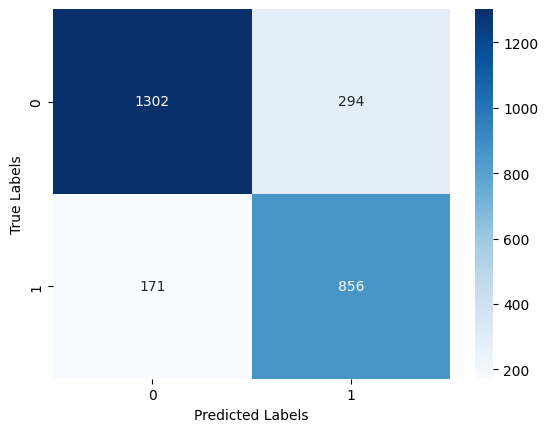

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat heatmap dari confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Menambahkan label pada sumbu x dan y
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Menampilkan plot
plt.show()

In [35]:
print(classification_report(predictions,y_test, digits=6))

              precision    recall  f1-score   support

           0   0.883910  0.815789  0.848485      1596
           1   0.744348  0.833496  0.786403      1027

    accuracy                       0.822722      2623
   macro avg   0.814129  0.824643  0.817444      2623
weighted avg   0.829267  0.822722  0.824178      2623



In [36]:
test = process_tweet("presiden jokowi sudah beragama islam sejak lahir")
example = vectorizer.transform([test])
print(lr.predict(example))

[0]


In [37]:
import pickle
filename = 'lr_model.pkl'
pickle.dump(lr, open(filename, 'wb'))

## Model ANN

In [38]:
from keras.models import Sequential
from keras.layers import Dense
from keras import layers
import tensorflow as tf

In [39]:
model = Sequential()
# Input - Layer
model.add(layers.Dense(50, activation = "relu", input_shape=(X_train.shape[1],)))
# Hidden - Layers
model.add(layers.Dropout(0.2))
model.add(layers.Dense(50, activation = "relu"))
model.add(layers.Dropout(0.2))
model.add(layers.Dense(50, activation = "relu"))
# Output- Layer
model.add(layers.Dense(1, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                50050     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dropout_1 (Dropout)         (None, 50)                0         
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 55201 (215.63 KB)
Trainable params: 55201 

In [40]:
from keras.callbacks import EarlyStopping

In [41]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
model.fit(X_train, y_train, epochs=100, callbacks=EarlyStopping(monitor='accuracy', patience=2))

Epoch 1/100
328/328 [==============================] - 5s 7ms/step - loss: 0.5355 - accuracy: 0.7099
Epoch 2/100
328/328 [==============================] - 2s 7ms/step - loss: 0.3762 - accuracy: 0.8346
Epoch 3/100
328/328 [==============================] - 2s 7ms/step - loss: 0.3207 - accuracy: 0.8614
Epoch 4/100
328/328 [==============================] - 2s 7ms/step - loss: 0.2669 - accuracy: 0.8878
Epoch 5/100
328/328 [==============================] - 2s 7ms/step - loss: 0.2235 - accuracy: 0.9074
Epoch 6/100
328/328 [==============================] - 3s 9ms/step - loss: 0.1837 - accuracy: 0.9288
Epoch 7/100
328/328 [==============================] - 2s 7ms/step - loss: 0.1535 - accuracy: 0.9396
Epoch 8/100
328/328 [==============================] - 2s 7ms/step - loss: 0.1347 - accuracy: 0.9449
Epoch 9/100
328/328 [==============================] - 2s 8ms/step - loss: 0.1170 - accuracy: 0.9527
Epoch 10/100
328/328 [==============================] - 3s 8ms/step - loss: 0.1107 - accura

In [42]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9510651230812073
Test accuracy: 0.8192908763885498


In [43]:
y_pred = model.predict(X_test) > 0.5
cm = confusion_matrix(y_test, y_pred)
cm

82/82 [==============================] - 0s 2ms/step


array([[1294,  179],
       [ 295,  855]])

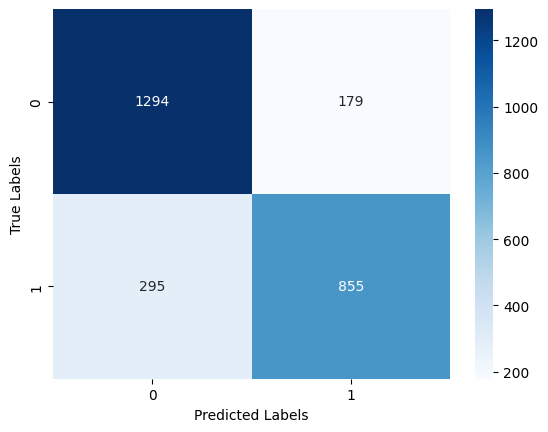

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Membuat heatmap dari confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")

# Menambahkan label pada sumbu x dan y
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Menampilkan plot
plt.show()

In [45]:
print(classification_report(y_pred,y_test, digits=6))

              precision    recall  f1-score   support

       False   0.878479  0.814349  0.845199      1589
        True   0.743478  0.826886  0.782967      1034

    accuracy                       0.819291      2623
   macro avg   0.810979  0.820617  0.814083      2623
weighted avg   0.825261  0.819291  0.820667      2623



In [46]:
print(model.predict(example)>0.5)

1/1 [==============================] - 0s 105ms/step
[[False]]


In [48]:
model.save('ann_model.keras')